In [1]:
import pandas as pd
df = pd.read_csv('Data/ozone2.csv')
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


In [2]:
# 한글 처리를 위한 폰트 설정

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(\
    fname= 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

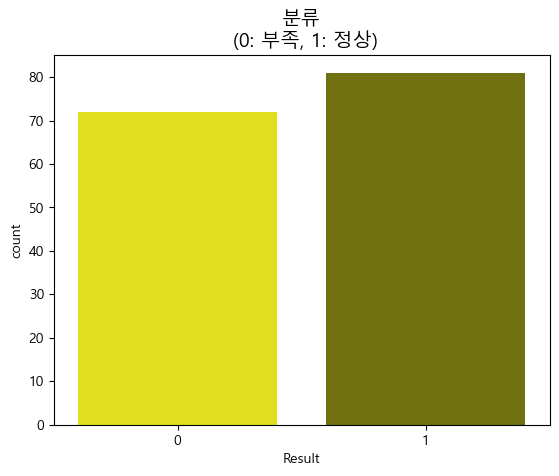

In [3]:
import seaborn as sns
colors = ['yellow','olive']
sns.countplot(x = 'Result', data = df, palette = colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize = 14)       # 불균형 데이터셋 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    153 non-null    int64  
 1   Day      153 non-null    int64  
 2   Solar.R  153 non-null    float64
 3   Wind     153 non-null    float64
 4   Temp     153 non-null    int64  
 5   Ozone    153 non-null    int64  
 6   Result   153 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 8.5 KB


In [5]:
df.describe()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,6.993464,15.803922,185.931507,9.957516,77.882353,42.098039,0.529412
std,1.416522,8.864520,87.960267,3.523001,9.465270,28.693426,0.500773
min,5.000000,1.000000,7.000000,1.700000,56.000000,1.000000,0.000000
25%,6.000000,8.000000,120.000000,7.400000,72.000000,21.000000,0.000000
50%,7.000000,16.000000,194.000000,9.700000,79.000000,42.000000,1.000000
75%,8.000000,23.000000,256.000000,11.500000,85.000000,46.000000,1.000000
max,9.000000,31.000000,334.000000,20.700000,97.000000,168.000000,1.000000


In [6]:
df.columns

Index(['Month', 'Day', 'Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [7]:
cols = ['Solar.R', 'Wind', 'Temp']
x = df[cols]
y = df.Result

In [8]:
# 언더샘플링 (Imbalanced-Learn)
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(x,y)

x_sample

,Solar.R,Wind,Temp
0,8.0,9.7,59
1,25.0,9.7,61
2,78.0,18.4,57
3,48.0,14.3,80
4,49.0,10.3,69
...,...,...,...
118,275.0,7.4,86
111,190.0,10.3,78
137,213.0,7.4,88
130,183.0,2.8,93


In [9]:
y_sample

0      0
1      0
2      0
3      0
4      0
      ..
118    1
111    1
137    1
130    1
84     1
Name: Result, Length: 144, dtype: int64

In [10]:
type(x_sample), type(y_sample)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [11]:
y_sample = pd.DataFrame(data=y_sample, columns = ['Result'])
df_sample = pd.concat([x_sample, y_sample], axis = 1)
df_sample.Result.value_counts()

Result
0    72
1    72
Name: count, dtype: int64

c:\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


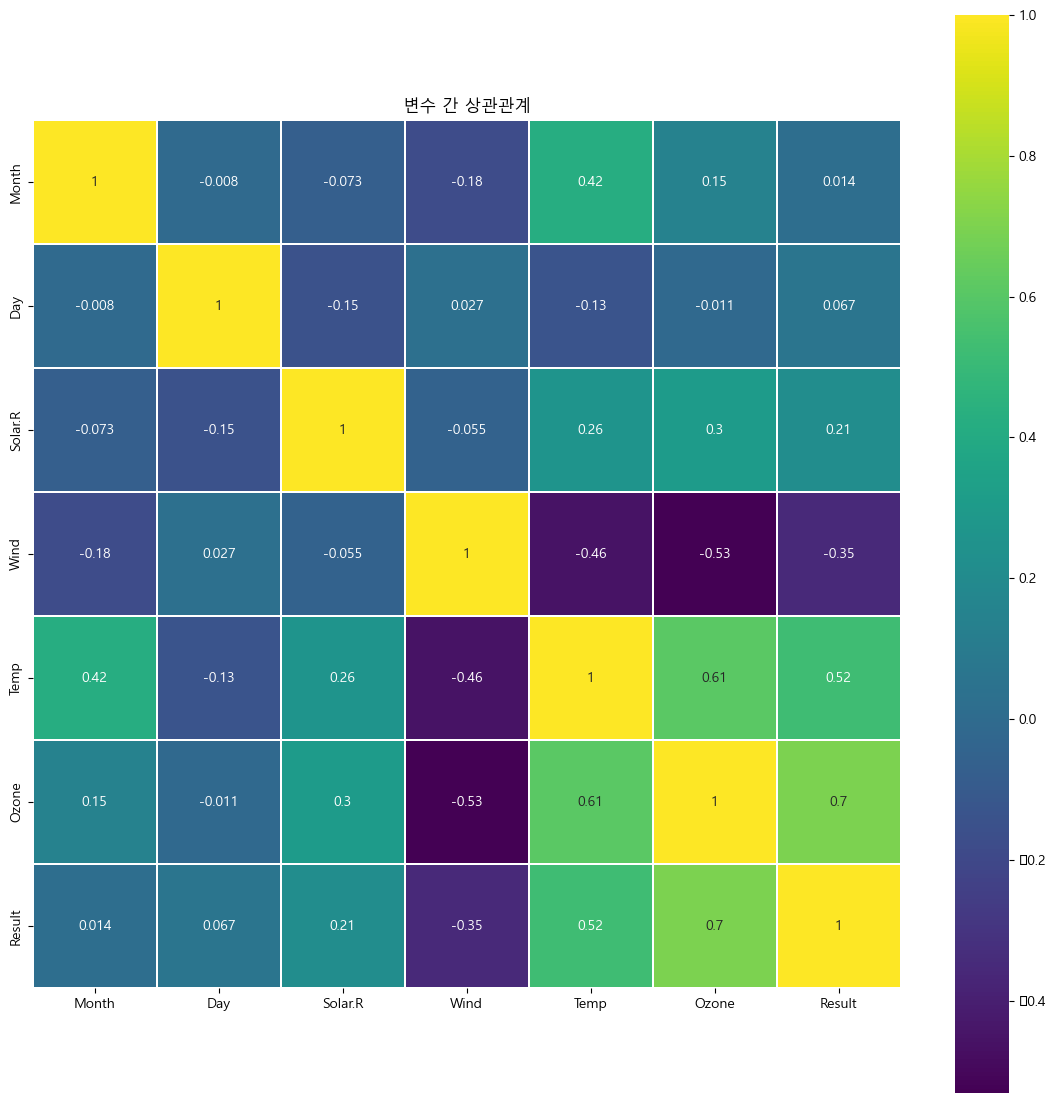

In [12]:
# 상관계수 행렬 그래프  
# 1에 너무 가까운값이 있으면 다중공선성 고려 필요
plt.figure(figsize = (14,14))
plt.rc('font', size = 10)
sns.heatmap(df.corr(), linewidths = 0.01, square = True,
            annot = True, cmap = plt.cm.viridis, linecolor = 'white')
plt.title('변수 간 상관관계')
plt.show()

In [13]:
# 데이터셋 구분
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x_sample, y_sample, stratify = y_sample, test_size = 0.2, random_state=7)

In [14]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_tr)
x_tr_scaled = scaler.transform(x_tr)
x_ts_scaled = scaler.transform(x_ts)

In [15]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(name = 'mymodel')
model.add(Dense(128, input_shape = (len(x_tr.columns),), activation = 'relu', name = 'hidden-1'))
model.add(Dense(64, activation = 'relu', name = 'hidden-2'))
model.add(Dense(64, activation = 'relu', name = 'hidden-3'))
model.add(Dense(1, activation='sigmoid', name = 'output'))

# 모델학습과정 설정
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 128)               512       
                                                                 
 hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 hidden-3 (Dense)            (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 12,993
Trainable params: 12,993
Non-trainable params: 0
_________________________________________________________________


In [17]:
from datetime import datetime
import tensorflow as tf
logdir = 'c:/workspace/logs/' + datetime.now().strftime('%Y%m%d-%H%M%S')
logdir

'c:/workspace/logs/20230720-103208'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

### tensorboard 모델 확인 가능
# (cmd) tensorboard --logdir= c:/workspace/logs/20230720-101707
# http://localhost:6006/

In [19]:
# 모델 학습
hist = model.fit(x_tr_scaled, y_tr, epochs = 500, callbacks = [tensorboard_callback])
    # 매 epochs이 끝날 때마다 callback, 기록

Epoch 1/500
4/4 [==============================] - 1s 80ms/step - loss: 0.2479 - accuracy: 0.5478
Epoch 2/500
4/4 [==============================] - 0s 30ms/step - loss: 0.2220 - accuracy: 0.6783
Epoch 3/500
4/4 [==============================] - 0s 52ms/step - loss: 0.2009 - accuracy: 0.7652
Epoch 4/500
4/4 [==============================] - 0s 68ms/step - loss: 0.1854 - accuracy: 0.7826
Epoch 5/500
4/4 [==============================] - 0s 28ms/step - loss: 0.1732 - accuracy: 0.7826
Epoch 6/500
4/4 [==============================] - 0s 29ms/step - loss: 0.1633 - accuracy: 0.7739
Epoch 7/500
4/4 [==============================] - 0s 27ms/step - loss: 0.1569 - accuracy: 0.7826
Epoch 8/500
4/4 [==============================] - 0s 27ms/step - loss: 0.1529 - accuracy: 0.7913
Epoch 9/500
4/4 [==============================] - 0s 25ms/step - loss: 0.1497 - accuracy: 0.8000
Epoch 10/500
4/4 [==============================] - 0s 25ms/step - loss: 0.1479 - accuracy: 0.7826
Epoch 11/500
4/4 [=

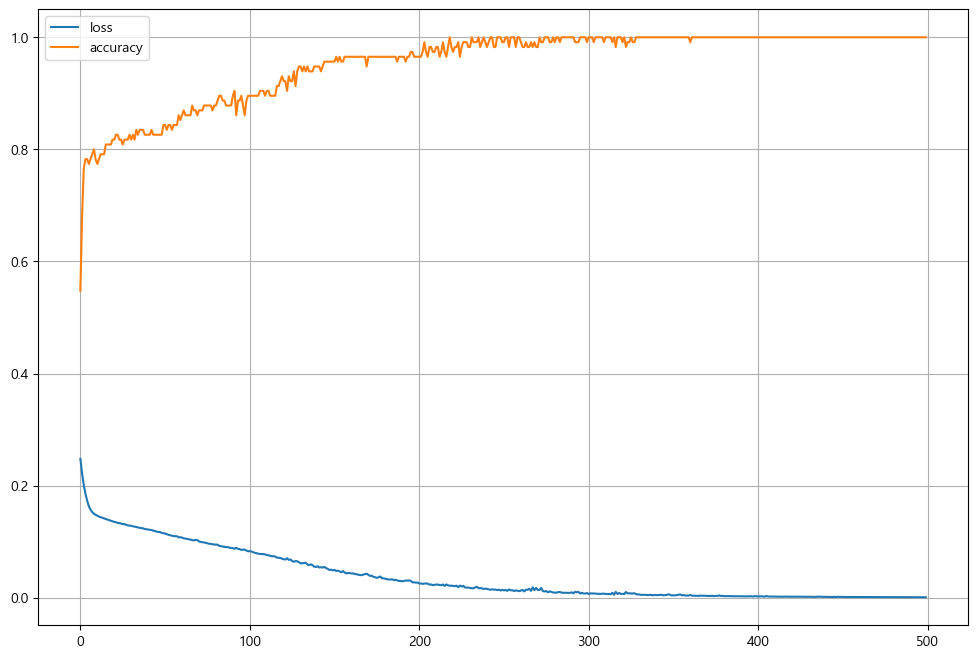

In [20]:
# 모델 학습과정 표시
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])   # 학습용 데이터셋 손실률
plt.plot(hist.history['accuracy'])   # 학습용 데이터셋 정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [21]:
# 모델 평가
scores_training = model.evaluate(x_tr_scaled, y_tr)
print(scores_training)
print('%s: %.2f%%' %(model.metrics_names[1], scores_training[1]*100))   # 학습용

scores_test = model.evaluate(x_ts_scaled, y_ts)
print(scores_test)
print('%s: %.2f%%' %(model.metrics_names[1], scores_test[1]*100))   # 검증용


4/4 [==============================] - 0s 3ms/step - loss: 8.1728e-04 - accuracy: 1.0000
[0.0008172826492227614, 1.0]
accuracy: 100.00%
1/1 [==============================] - 0s 23ms/step - loss: 0.3209 - accuracy: 0.6207
[0.3208869695663452, 0.6206896305084229]
accuracy: 62.07%


In [22]:
# 새로운 값 예측
# test1) 일조량 25, 풍량 10.8, 화씨온도 71도 일 때의 오존량
test1 = [[25, 10.8, 71]]
test1 = scaler.transform(test1)
print(model.predict(test1))

1/1 [==============================] - 0s 74ms/step
[[0.05876708]]


c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
# test2) 일조량 20, 풍량 4.3, 화씨온도 90도 일 때의 오존량
test2 = [[20, 4.3, 90]]
test2 = scaler.transform(test2)
print(model.predict(test2))

1/1 [==============================] - 0s 21ms/step
[[1.]]


c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
# 모델 저장
model.save('Data/result/ozone/ozone.h5')

# 가중치와 편향 등의 정보가 함께 저장됨
# model.save('Data/result/ozone')    

In [26]:
# scaler도 저장
import joblib
joblib.dump(scaler, 'Data/result/ozone/scaler.model')

['Data/result/ozone/scaler.model']